# Clustering - Class 1

### Author:  Ricardo Vallejo

https://realpython.com/k-means-clustering-python/

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

-implementation here: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html


Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.
Clustering is an Unsupervised Learning Problem

Such problems, without any fixed target variable, are known as unsupervised learning problems. In these problems, we only have the independent variables and no target/dependent variable.

“the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

    
- K-means converges in a finite number of iterations. Since the algorithm iterates a function whose domain is a finite set, the iteration must eventually converge.

- The computational cost of the k-means algorithm is O(k*n*d), where n is the number of data points, k the number of clusters, and d the number of attributes.

- K-means clustering is one of the simplest unsupervised machine learning algorithms.

- Compared to other clustering methods, the k-means clustering technique is fast and efficient in terms of its computational cost.

- It’s difficult to predict the optimal number of clusters or the value of k. To find the number of clusters optimal for the algorithme, we have to use Silhouette and Below Methode.



## 1. Load Data

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("DataClustering.xls")
display(df)

print('DATA information:')
display(df.info())


,X1,X2,X3,X4
0,4.3,3.0,1.1,0.1
1,4.4,2.9,1.4,0.2
2,4.4,3.0,1.3,0.2
3,4.4,3.2,1.3,0.2
4,4.5,2.3,1.3,0.3
...,...,...,...,...
145,7.7,3.8,6.7,2.2
146,7.7,2.6,6.9,2.3
147,7.7,2.8,6.7,2.0
148,7.7,3.0,6.1,2.3


DATA information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      150 non-null    float64
 1   X2      150 non-null    float64
 2   X3      150 non-null    float64
 3   X4      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


None

## 2. Set X3, X4 like characteristics variables.

In [25]:
X = df[['X3', 'X4']].values
fn = ['X3', 'X4']

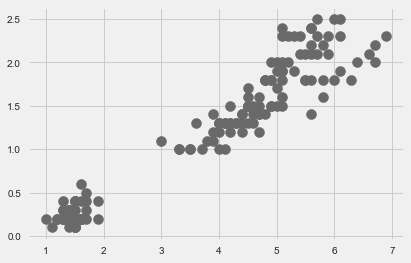

In [26]:
fig = plt.figure(figsize=(6,4))
plt.scatter(df[['X3']], df[['X4']], s=100, c='dimgray', label='Scatter plot')

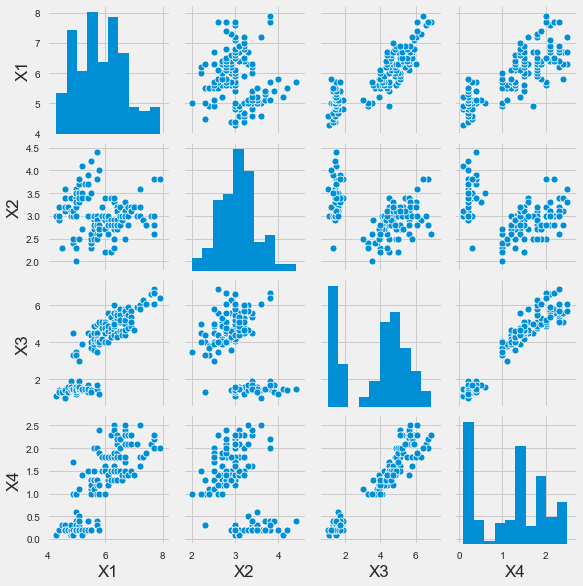

In [27]:
sns.pairplot(df, height = 2, palette = 'colorblind');

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


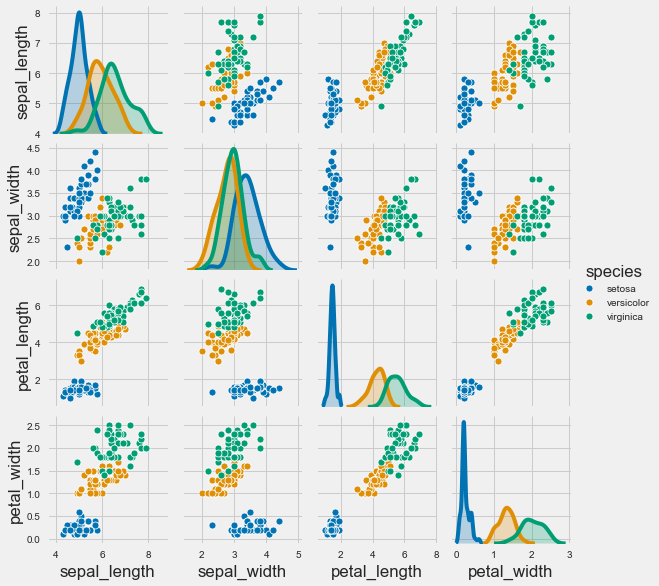

In [28]:
#Iris remember... and i dont know species data

dataIris = pd.read_csv("iris.csv")
display(dataIris)
sns.pairplot(dataIris, hue="species", height = 2, palette = 'colorblind');
plt.show()

## 2.1. Clustering Model using kMeans and df [x3,x4]

## 2.1.1. Find optimal number of clusters

- https://www.kaggle.com/kautumn06/yellowbrick-clustering-evaluation-examples
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891


## Elbow Methode

Text(0, 0.5, 'Inertia')

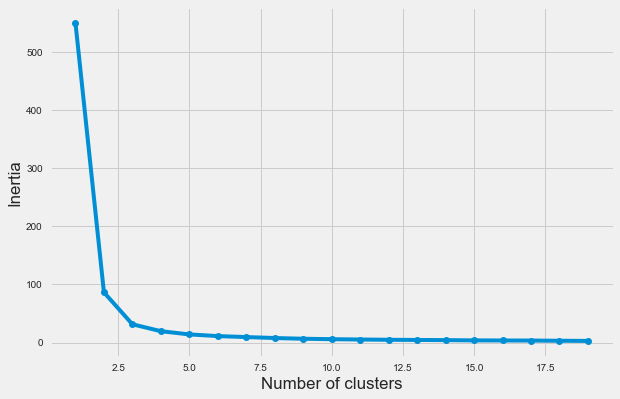

In [54]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(9,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [55]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

sum_of_squared_distances = []
K=range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    

k1 = KneeLocator(range(1,15), sum_of_squared_distances, curve='convex', direction='decreasing')
print('The value of Elbow is:  ', k1.elbow)

The value of Elbow is:   3


## Silhouette Methode

The silhouette Method is also a method to find the optimal number of clusters and interpretation and validation of consistency within clusters of data. 

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model.

where scores near +1 indicate high separation 
and scores near -1 indicate that the samples may have been assigned to the wrong cluster.
scores near to zero, sample near to limit and bas cohesion a son cluster

Thickness of cluster its quantity of values in Cluster, bad clustering has cluster with not too much samples.

The silhouette plot shows that the n_cluster value of 4 is a bad pick, as all the points in the cluster with cluster_label=2 are below-average silhouette scores.

The thickness of the silhouette plot for the cluster with cluster_label=1 when n_clusters=2, is bigger in size owing to the grouping of the 3 sub-clusters into one big cluster.

For n_clusters=4, all the plots are more or less of similar thickness and hence are of similar sizes, as can be considered as best ‘k’.



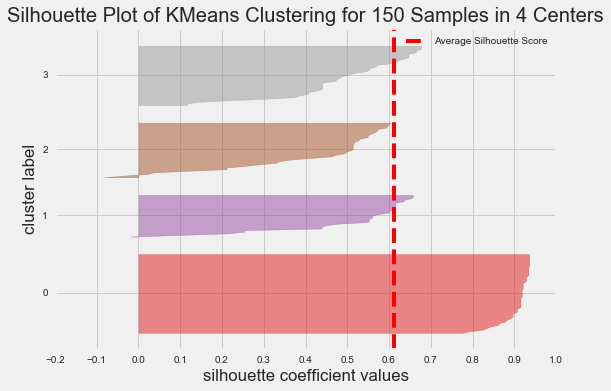

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# https://www.scikit-yb.org/en/latest/  ===>Yellowbrick: Machine Learning Visualization

model = SilhouetteVisualizer(KMeans(4))
model.fit(X)
model.show()

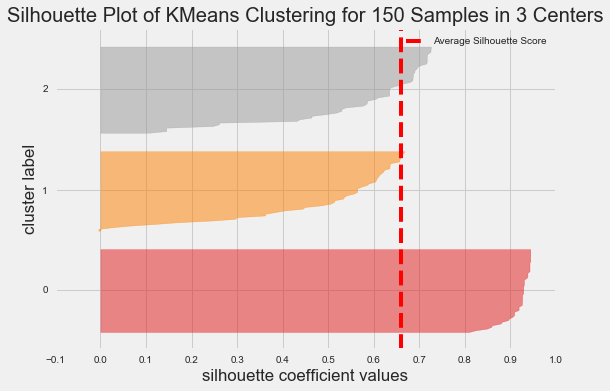

In [57]:
KC= 3
model = SilhouetteVisualizer(KMeans(KC))
model.fit(X)
model.show()

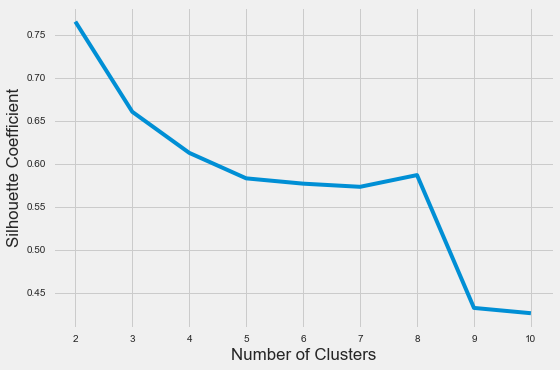

In [58]:
# Usinng Coefficient of Sihouette

from sklearn.metrics import silhouette_score

kmeans_kwargs = {
"init": "random",
"n_init": 10,
 "max_iter": 300,
 "random_state": 42,
}

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# 2.2.  Cluster Model

In [59]:
from sklearn.cluster import KMeans

KC = 3
kmeans = KMeans(n_clusters = KC, init = 'random', max_iter=400, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)
display(y_kmeans)# ==> Groups trouved by my classificator = Clustering
print(y_kmeans.shape)
#y_kmeans take values 0,1,2 when KC=3


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(150,)


## Results model

In [60]:
# inertia on the fitted data - Let’s evaluate how well the formed clusters are
 # The number of iterations required to converge
print('kmeans.n_iter_',kmeans.n_iter_)
print('kmeans.cluster_centers_ \n',kmeans.cluster_centers_)
print('kmeans.inertia_',kmeans.inertia_)

kmeans.n_iter_ 7
kmeans.cluster_centers_ 
 [[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]
kmeans.inertia_ 31.387758974358977


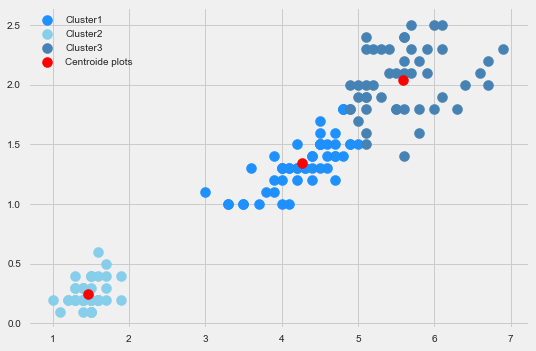

In [61]:

#0 et 1 pour indexer X3, X4

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='dodgerblue', label='Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='skyblue', label='Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='steelblue', label='Cluster3')

#Plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'red', label = 'Centroide plots')
plt.legend()


# Debugging problem for install modules

In [62]:
!jupyter kernelspec list


Available kernels:
  anaconda-base    C:\Users\valm044\AppData\Roaming\jupyter\kernels\anaconda-base
  python3          C:\Users\valm044\Anaconda3\share\jupyter\kernels\python3


In [63]:
!jupyter kernelspec list --json #"C:/Users/valm044/Anaconda3\\python.exe", pyton pour jupyter 

{
  "kernelspecs": {
    "anaconda-base": {
      "resource_dir": "C:\\Users\\valm044\\AppData\\Roaming\\jupyter\\kernels\\anaconda-base",
      "spec": {
        "argv": [
          "C:\\Users\\valm044\\Anaconda3\\python.exe",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Anaconda (base)",
        "language": "python",
        "interrupt_mode": "signal",
        "metadata": {}
      }
    },
    "python3": {
      "resource_dir": "C:\\Users\\valm044\\Anaconda3\\share\\jupyter\\kernels\\python3",
      "spec": {
        "argv": [
          "C:/Users/valm044/Anaconda3\\python.exe",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Python 3",
        "language": "python",
        "interrupt_mode": "signal",
        "metadata": {}
      }
    }
  }
}


In [64]:
!which python # --> /c/Python/python-3.5.1/python  Default version of python in my system
!which -a python #--> All pythons installed --> /c/Python/python-3.5.1/python in my system
!C:/Users/valm044/Anaconda3\\python --version  #--> 3.7.6 in Anaconda
!C:/Python/python-3.5.1/python --version #--3.5.1


    
# I have to add my local environmnet or anothers versions of python to jupyter and create their kernels




The system cannot find the path specified.
The system cannot find the path specified.


Python 3.5.1


# 3.  Including all characteristics df [x1,x2,x3,x4] DATA

In [65]:
X2 = df[['X1', 'X2','X3', 'X4']].values
fn2 = ['X1', 'X2', 'X3', 'X4']

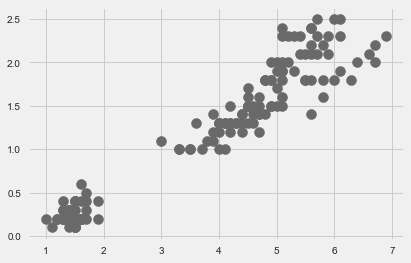

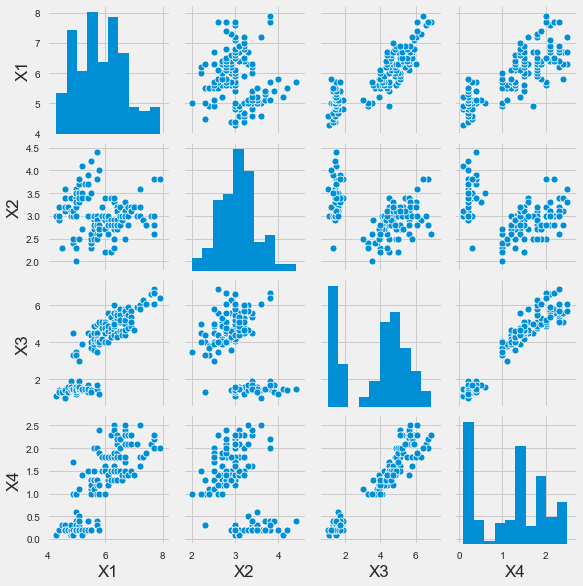

In [66]:
fig = plt.figure(figsize=(6,4))
plt.scatter(df[['X3']], df[['X4']], s=100, c='dimgray', label='Scatter plot')
sns.pairplot(df, height = 2, palette = 'colorblind');

## 3.1.  Optimal number of Clusters

## Elbow Methode

In [67]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

sum_of_squared_distances2 = []
K=range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    sum_of_squared_distances2.append(km.inertia_)
    

k1 = KneeLocator(range(2,11), sum_of_squared_distances2, curve='convex', direction='decreasing')
print('The value of Elbow is:  ', k1.elbow)

# Number of classes ideals a classifier avec le set de donnes X3, X4

The value of Elbow is:   4


Text(0, 0.5, 'Inertia')

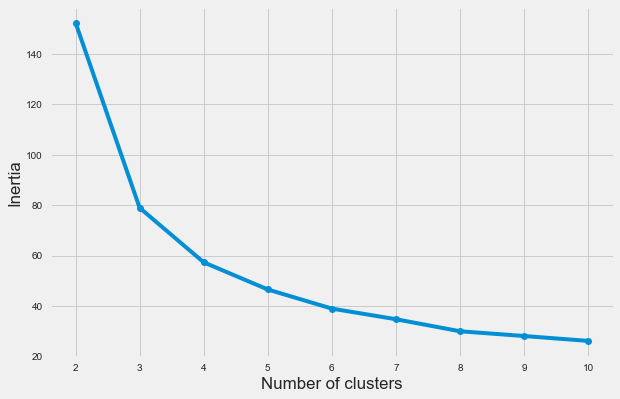

In [68]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,11), 'sum_of_squared_distances2':sum_of_squared_distances2})
plt.figure(figsize=(9,6))
plt.plot(frame['Cluster'], frame['sum_of_squared_distances2'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## Silhouette Methode

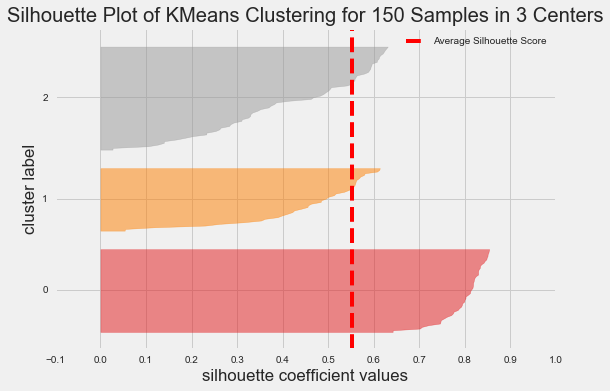

In [69]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# https://www.scikit-yb.org/en/latest/  ===>Yellowbrick: Machine Learning Visualization

model = SilhouetteVisualizer(KMeans(KC))
model.fit(X2)
model.show()

#The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

#How close the data point is to other points in the cluster
#How far away the data point is from points in other clusters

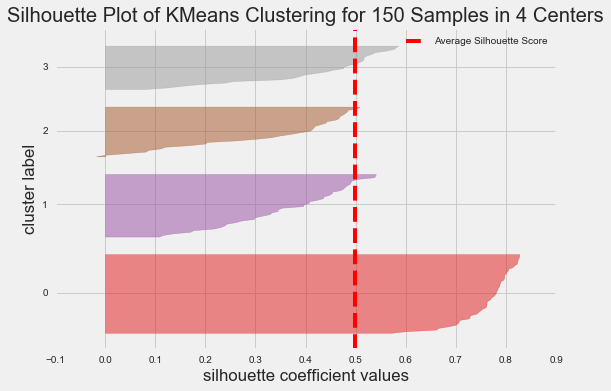

In [71]:
model = SilhouetteVisualizer(KMeans(4))
model.fit(X2)
model.show()

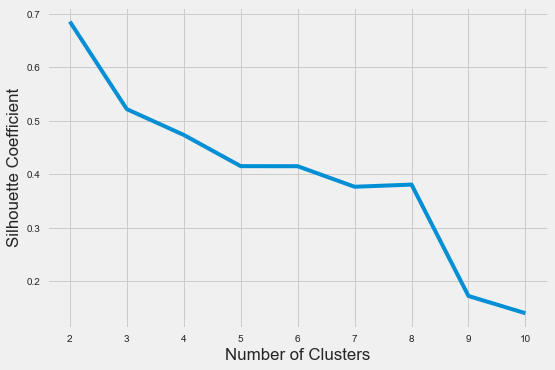

In [70]:
# Usinng Coefficient of Sihouette

from sklearn.metrics import silhouette_score

kmeans_kwargs = {
"init": "random",
"n_init": 10,
 "max_iter": 300,
 "random_state": 42,
}

silhouette_coefficients2 = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X2, kmeans.labels_)
    silhouette_coefficients2.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients2)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# 3.2.  Clustering model Kmeans df[x1, x2, x3, x4]

In [34]:
from sklearn.cluster import KMeans

KC = 3
kmeans2 = KMeans(n_clusters = KC, init = 'random', max_iter=400, n_init=10, random_state=0)
y_kmeans2=kmeans2.fit_predict(X2)
display(y_kmeans2)# ==> Groups trouved by my classificator = Clustering
print(y_kmeans2.shape)
#y_kmeans take values 0,1,2 when KC=3


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(150,)


## With more descriptors interrealtion between them.

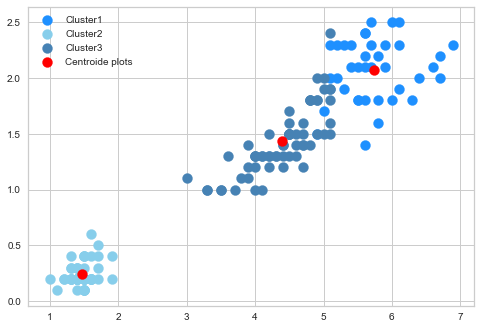

In [55]:
#Indexer  X3, X4

plt.scatter(X2[y_kmeans2 == 0, 2], X2[y_kmeans2 == 0, 3], s=100, c='dodgerblue', label='Cluster1')
plt.scatter(X2[y_kmeans2 == 1, 2], X2[y_kmeans2 == 1, 3], s=100, c='skyblue', label='Cluster2')
plt.scatter(X2[y_kmeans2 == 2, 2], X2[y_kmeans2 == 2, 3], s=100, c='steelblue', label='Cluster3')

#Plotting centroids of clusters
plt.scatter(kmeans2.cluster_centers_[:,2], kmeans2.cluster_centers_[:,3], s=100, c = 'red', label = 'Centroide plots')
plt.legend()


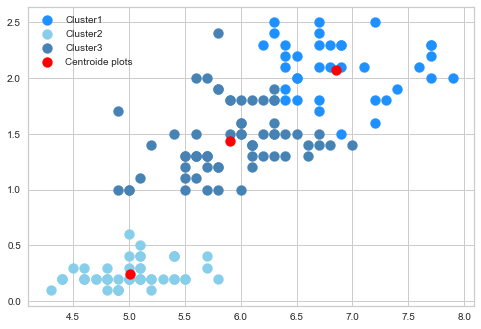

In [86]:
#Indexer  X1, X4

plt.scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 3], s=100, c='dodgerblue', label='Cluster1')
plt.scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 3], s=100, c='skyblue', label='Cluster2')
plt.scatter(X2[y_kmeans2 == 2, 0], X2[y_kmeans2 == 2, 3], s=100, c='steelblue', label='Cluster3')

#Plotting centroids of clusters
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,3], s=100, c = 'red', label = 'Centroide plots')
plt.legend()


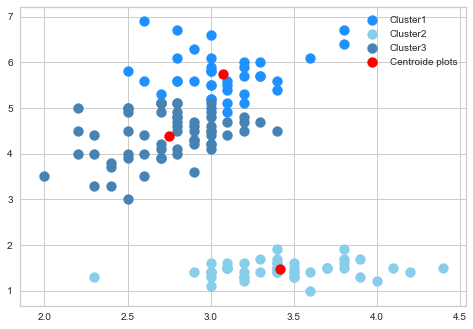

In [87]:
#Indexer  X2, X3

plt.scatter(X2[y_kmeans2 == 0, 1], X2[y_kmeans2 == 0, 2], s=100, c='dodgerblue', label='Cluster1')
plt.scatter(X2[y_kmeans2 == 1, 1], X2[y_kmeans2 == 1, 2], s=100, c='skyblue', label='Cluster2')
plt.scatter(X2[y_kmeans2 == 2, 1], X2[y_kmeans2 == 2, 2], s=100, c='steelblue', label='Cluster3')

#Plotting centroids of clusters
plt.scatter(kmeans2.cluster_centers_[:,1], kmeans2.cluster_centers_[:,2], s=100, c = 'red', label = 'Centroide plots')
plt.legend()

# Results model 

In [149]:
# inertia on the fitted data - Let’s evaluate how well the formed clusters are
 # The number of iterations required to converge
print('kmeans.n_iter_',kmeans2.n_iter_)
print('kmeans.cluster_centers_ \n',kmeans2.cluster_centers_)
print('kmeans.inertia_',kmeans2.inertia_)

kmeans.n_iter_ 4
kmeans.cluster_centers_ 
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
kmeans.inertia_ 78.94084142614601
